In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx

import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk import bigrams

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nimes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nimes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd.read_csv('E:/Project 5 credits/new/Sri Lanka/depressive_unigram_tweets_final.csv')
df2 = pd.read_csv('E:/Project 5 credits/new/Sri Lanka/depressive_unigram_tweets_final.csv')

In [3]:
df2.isnull().any().any()

True

In [4]:
df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1513 non-null   int64  
 1   id            1513 non-null   int64  
 2   time          1513 non-null   object 
 3   tweet         1513 non-null   object 
 4   language      1513 non-null   object 
 5   hashtags      1513 non-null   object 
 6   cashtags      1513 non-null   object 
 7   thumbnail     351 non-null    object 
 8   source        0 non-null      float64
 9   user_rt       0 non-null      float64
 10  retweet_id    0 non-null      float64
 11  reply_to      1513 non-null   object 
 12  retweet_date  0 non-null      float64
 13  translate     0 non-null      float64
 14  trans_src     0 non-null      float64
 15  trans_dest    0 non-null      float64
dtypes: float64(7), int64(2), object(7)
memory usage: 189.2+ KB


In [5]:
df2['clean_tweet'] = df2['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
print(df2)

      Unnamed: 0                   id      time  \
0              0  1314463232799563776  12:40:30   
1              1  1240137433057984512  10:16:19   
2              2  1238694003874422784  10:40:39   
3              3  1226173869117071360  21:30:06   
4              4   566255648091152384  20:50:41   
...          ...                  ...       ...   
1508        1704  1351727432919781379  08:35:08   
1509        1707  1351545641999060993  20:32:46   
1510        1708  1351542740039856129  20:21:14   
1511        1709  1351537459234893824  20:00:15   
1512        1715  1316032629259431936  20:36:44   

                                                  tweet language  \
0     Corona season comming soon!!!!! @ Union Place ...       en   
1     Corona Holidays be like 👀  https://t.co/mBo1FY...       en   
2     The_beginning_of_corona_vacation ;-) 😁 On_the_...       en   
3     අවදානමට පෙර සූදානම 😔 #Coronavius #corona #lka ...       si   
4     Drinking Corona! Hell Yeah! #Corona #Feel

In [6]:
df2['vader_score'] = df2['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [7]:
positive_num = len(df2[df2['vader_score'] >=0.05])
negative_num = len(df2[df2['vader_score']<0.05])
df2['vader_sentiment_label']= df2['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

In [8]:
df2 = df2.reindex(columns=['vader_sentiment_label', 'vader_score', 'clean_tweet'])
df2.head()

,vader_sentiment_label,vader_score,clean_tweet
0,0,0.0000,Corona season comming soon!!!!! @ Union Place ...
1,1,0.6249,Corona Holidays like 👀 https://t.co/mBo1FYhQSR
2,1,0.7906,The_beginning_of_corona_vacation ;-) 😁 On_the_...
3,1,0.0772,අවදානමට පෙර සූදානම 😔 #Coronavius #corona #lka ...
4,0,-0.6103,Drinking Corona! Hell Yeah! #Corona #FeelingGr...


In [9]:
df2.to_csv('vader_processed_final.csv')

In [10]:
df2['text'] = df2['clean_tweet']
df2['text']

0       Corona season comming soon!!!!! @ Union Place ...
1          Corona Holidays like 👀 https://t.co/mBo1FYhQSR
2       The_beginning_of_corona_vacation ;-) 😁 On_the_...
3       අවදානමට පෙර සූදානම 😔 #Coronavius #corona #lka ...
4       Drinking Corona! Hell Yeah! #Corona #FeelingGr...
                              ...                        
1508    India starts supply COVID vaccines 6 neighbour...
1509    #india waiting #srilankas necessary regulation...
1510    #india supply #covid #vaccine neighbors ! #sri...
1511    Washington state taps Starbucks help Covid vac...
1512    @PierrePoilievre Have consider year GDP contra...
Name: text, Length: 1513, dtype: object

In [11]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())
all_tweets_no_urls = [remove_url(tweet) for tweet in df2['text']]
all_tweets_no_urls[:5]

['Corona season comming soon Union Place',
 'Corona Holidays like',
 'Thebeginningofcoronavacation Onthewaytohome Pettah Bus Stand',
 'Coronavius corona lka SriLanka',
 'Drinking Corona Hell Yeah Corona FeelingGreat Keg BestBuddies The Keg Pub amp Restaurant']

In [12]:
#lower_case = [word.lower() for word in df_new['text']]
sentences = df2['text']
all_tweets_no_urls[0].split()
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['corona', 'season', 'comming', 'soon', 'union', 'place'],
 ['corona', 'holidays', 'like']]

In [13]:
#List of all words
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)

[('covid19', 1036),
 ('srilanka', 467),
 ('sri', 350),
 ('lka', 346),
 ('lanka', 308),
 ('quarantine', 281),
 ('home', 212),
 ('coronavirus', 193),
 ('corona', 186),
 ('covid19sl', 169),
 ('colombo', 158),
 ('covid', 149),
 ('covid19lk', 147),
 ('stay', 143),
 ('i', 135)]

In [14]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])
clean_tweets_no_urls.head()


,words,count
0,covid19,1036
1,srilanka,467
2,sri,350
3,lka,346
4,lanka,308


In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['corona', 'season', 'comming', 'soon', 'union', 'place']

In [16]:
all_words_nsw = list(itertools.chain(*tweets_nsw))  
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('covid19', 1036),
 ('srilanka', 467),
 ('sri', 350),
 ('lka', 346),
 ('lanka', 308),
 ('quarantine', 281),
 ('home', 212),
 ('coronavirus', 193),
 ('corona', 186),
 ('covid19sl', 169),
 ('colombo', 158),
 ('covid', 149),
 ('covid19lk', 147),
 ('stay', 143),
 ('cases', 126)]

In [17]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [18]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('covid19', 1036),
 ('srilanka', 467),
 ('sri', 350),
 ('lka', 346),
 ('lanka', 308),
 ('quarantine', 281),
 ('home', 212),
 ('coronavirus', 193),
 ('corona', 186),
 ('covid19sl', 169),
 ('colombo', 158),
 ('covid', 149),
 ('covid19lk', 147),
 ('stay', 143),
 ('cases', 126)]

In [19]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,covid19,1036
1,srilanka,467
2,sri,350
3,lka,346
4,lanka,308


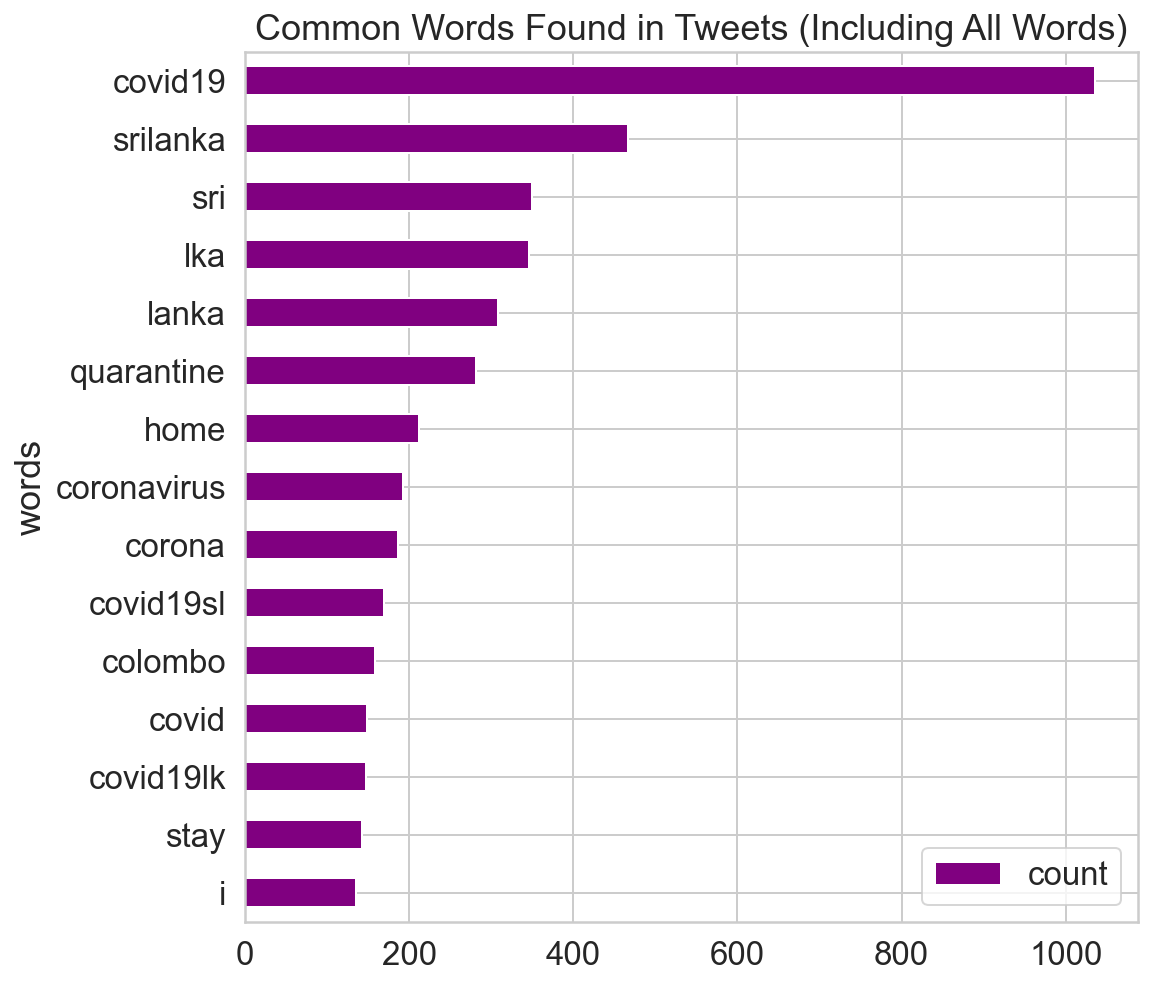

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [21]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)
bigram_df = pd.DataFrame(bigram_counts.most_common(20),columns=['bigram', 'count']) 
bigram_df

,bigram,count
0,"(sri, lanka)",297
1,"(srilanka, lka)",145
2,"(lka, coronavirus)",87
3,"(stay, home)",86
4,"(lka, srilanka)",77
5,"(coronavirus, covid19)",73
6,"(covid19sl, covid19lk)",69
7,"(positive, covid19)",66
8,"(covid, 19)",61
9,"(tested, positive)",57
